# LDA 
## 1 Introduction
```
Motivation：
什么是LDA模型？
LDA的有哪些应用？

```


![Bert-LDA pipeline](https://miro.medium.com/max/1410/1*OKCYnB-JbGq1NDwNSKd5Zw.png)


> - We describe latent Dirichlet allocation (LDA), a generative probabilistic model for collections of discrete data such as text corpora. </br>
> - LDA is a three-level hierarchical Bayesian model, in which each item of a collection is modeled as a ﬁnite mixture over an underlying set of topics. Each topic is, in turn, modeled as an inﬁnite mixture over an underlying set of topic probabilities.

LDA 模型是一种对于一组例如文本的离散数据的概率生成模型
LDA 模型是一个三层神经网络，认为每个个体由有限个主题混合组成的。我们对于属于每个主题的概率进行建模。

### Application 
 document modeling 文本建模
- unsupervised learning 无监督学习
- density estimation 

document classification 文本分类

collaborative filtering 协同过滤

## 2 Model
```
Motivation：
- 为了更简洁描述LDAmodel，在这一部分我们学习LDA的数据表征和网络结构。
- 并且，作为贝叶斯统计中常常被使用的先验分布，Dirchlet distribution
常常被类别的假设中使用。但是，在传统的概率论的课堂上我们并不会涉及。所以，
我们也会简单谈谈Dirchlet分布的优越性。
- 希望通过Dirchlet 分布，我们领会看到机器学习中关于参数分布假设的思想。
```
### 2.1 Concpet 
![](https://miro.medium.com/max/1400/0*II7wZlKViCt4ssBm.png)

#### review: Beysian inference
posterior distribution $p(θ|x)$
prior distribution $p(θ)$
If the prior and posterior are the samee, they are called conjugate distributions(共轭分布)
then the prior is the conjugate prior for the likelihood function. 
![](https://miro.medium.com/max/1120/1*oFHa5RIsf8Bki1gkX3aSxg.png)

Since the likelihood function is usually defined from the data generating process, we can see that the difference choices of prior can make the integral more or less difficult to calculate. 

If the prior has the same algebraic form as the likelihood, then often we can obtain a closed-form expression for the posterior, avoiding the need of numerical integration.

#### **Dirchlet Distributiobn:**

```
Think: 从直觉上来讲，主题的分布需要具有哪些性质？
```

首先，我们举一个抛硬币的例子：我们假设抛一个均匀三面骰子，得到「1，2，3」的概率分别为 1/3，我们假设1，2，3 的概率分别为$\theta=(\theta_1,\theta_2,\theta_3)$
我们如何描述 投掷1次，5次，50次结果的概率？
$$p(\mathcal{D} \mid \boldsymbol{\theta})=\prod_{k=1}^{3} \theta_{k}^{N_{k}}, N_{k}=\sum_{i=1}^{N} \mathbb{I}\left(y_{i}=k\right)$$

- 我们认为 $\theta_1.\theta_2,\theta_3$的分布相互独立
- 在概率之和为1的约束下，存在$\theta$的平面
- $\theta_i \in (0,1)$

我们从抛掷硬币的分布推广到主题分布：


$$
x_{1}, \ldots, x_{K} \text { where } x_{i} \in(0,1) 
$$
$$\sum_{i=1}^{K} x_{i}=1\operatorname{Dir}(\boldsymbol{\theta} \mid \boldsymbol{\alpha})=\frac{1}{\operatorname{Beta}(\boldsymbol{\alpha})} \prod_{i=1}^{K} \theta_{i}^{\alpha_{i}-1},$$
$$\operatorname{Beta}(\boldsymbol{\alpha})=\frac{\prod_{i=1}^{K} \Gamma\left(\alpha_{i}\right)}{\Gamma\left(\sum_{i=1}^{K} \alpha_{i}\right)} \text { and } \boldsymbol{\alpha}=\left(\alpha_{1}, \ldots, \alpha_{k}\right)
$$




### 2.2 Assumption
1. Choose $N \sim  Poisson  (\xi) $.
2. Choose $\theta \sim \operatorname{Dir}(\alpha)$ .
3. For each of the $ N$  words  $w_{n}$  :
- Choose a topic  $z_{n} \sim \operatorname{Multinomial}(\theta) $.
- Choose a word  $w_{n}$  from  $p\left(w_{n} \mid z_{n}, \beta\right)$ , a multinomial probability conditioned on the topic  $z_{n}$ .
#### loss function
$$\ell(\alpha, \beta)=\sum_{d=1}^{M} \log p\left(\mathbf{w}_{d} \mid \alpha, \beta\right)$$

![](http://gregorygundersen.com/image/dirichlet/simplex.png)

#### 3 inference,estimation & optimization 
```
LDA 模型是典型的概率生成模型probabilistic generative model。
所以，我们以probabilistic generative model为例，加深对Bayesian inference的理解，
加深对probabilistic generative model的认识
在LDA模型下，我们假设变量具有一些良好性质（可交换性），这会如何时LDA估计变的更“智能”？

```
we assume that words are generated by topics (by ﬁxed conditional distributions) and that those topics are inﬁnitely exchangeable within a document.

inference:
$$p(\theta, \mathbf{z} \mid \mathbf{w}, \alpha, \beta)=\frac{p(\theta, \mathbf{z}, \mathbf{w} \mid \alpha, \beta)}{p(\mathbf{w} \mid \alpha, \beta)}$$

marginal distribution:

$$p(\mathbf{w} \mid \alpha, \beta)=\int p(\theta \mid \alpha)\left(\prod_{n=1}^{N} \sum_{z_{n}} p\left(z_{n} \mid \theta\right) p\left(w_{n} \mid z_{n}, \beta\right)\right) d \theta$$


$$p(\mathbf{w} \mid \alpha, \beta)=\frac{\Gamma\left(\sum_{i} \alpha_{i}\right)}{\prod_{i} \Gamma\left(\alpha_{i}\right)} \int\left(\prod_{i=1}^{k} \theta_{i}^{\alpha_{i}-1}\right)\left(\prod_{n=1}^{N} \sum_{i=1}^{k} \prod_{j=1}^{V}\left(\theta_{i} \beta_{i j}\right)^{w_{n}^{j}}\right) d \theta$$
 
 Our goal is to maximum log-likihood function:

 $$\ell(\boldsymbol{\alpha}, \boldsymbol{\beta})=\sum_{d=1}^{M} \log p\left(\mathbf{w}_{d} \mid \boldsymbol{\alpha}, \boldsymbol{\beta}\right)$$




# Analysing ESG report using Natural Language Processing
1


## Summary
Environment, Social and Corporate Governance (ESG) refers to the three central factors in measuring the sustainability and societal impact of an investment in a company or business.  These criteria help to better determin the future financial performance of companies (return and risk).

This analysis extracts text from a ESG report in PDF format from the internet, performs NLP on these information, summaries the key ESG initiatives with WordClouds, TDIDFs and discovers topics by building a Latent Dirichlet Allocation (LDA) model.

To keep this exercise as simple as possible, only one ESG report is being used.  Specifically the [Citibank's 2019 ESG report](https://www.citigroup.com/citi/about/esg/download/2019/Global-ESG-Report-2019.pdf?ieNocache=967).  

Given that ESG is a broad topic.  Different companies focus on different aspects of ESG depending on their business operations and culture.  One can potentially ingest more ESG reports from different companies across all sectors and industries to capture relevant ESG topics.  This to be attempted in another analysis.



## Reference

1. [A data-driven approach to Environmental, Social and Governance](https://databricks.com/blog/2020/07/10/a-data-driven-approach-to-environmental-social-and-governance.html)
2. [Higher ESG ratings are generally positively correlated with valuation and profitability while negatively correlated with volatility.](https://corpgov.law.harvard.edu/2020/01/14/esg-matters/)
3. [Topic Modeling with Gensim (Python)](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)
4. [Citibank's 2019 ESG report](https://www.citigroup.com/citi/about/esg/download/2019/Global-ESG-Report-2019.pdf?ieNocache=967)
5. [Databricks - ESG Reports](https://databricks.com/notebooks/esg_notebooks/01_esg_report.html)
5. [Databricks - Data Driven ESG Score](https://databricks.com/notebooks/esg_notebooks/02_esg_scoring.html)
6. [Databricks - ESG Market Risk](https://databricks.com/notebooks/esg_notebooks/03_esg_market.html)
7. [Topic Modeling and Latent Dirichlet Allocation (LDA) in Python](https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24)
8. [Evaluate Topic Models: Latent Dirichlet Allocation (LDA)](https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0)
9. [Topic modeling visualization – How to present the results of LDA models?](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install Dependencies

In [ ]:
!pip install PyPDF2
!pip install gensim
!pip install nltk
!pip install WordCloud
!pip install pdfminer3
!pip install mlflow
!pip3 install spacy
!pip3 install pyLDAvis==2.1.2
!pip freeze
!pip install pyLDAvi

     |████████████████████████████████| 77 kB 3.4 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61101 sha256=1b79c963db23f2f7b46719d94474853f33a78371a7efae9544f628abb14aa8cf
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2
     |████████████████████████████████| 5.0 MB 5.6 MB/s 
     |████████████████████████████████| 2.0 MB 39.4 MB/s 
  Created wheel for pdfminer3: filename=pdfminer3-2018.12.3.0-py3-none-any.whl size=117825 sha256=e3eb574e392f23c1638e9bb6cee7a0fdb9fe16caef64b149bf055d5596dff734
  Stored in directory: /root/.cache/pip/wheels/f6/1b/21/339d1825e274c4a9829233a986f93dcedb98913f98e85b2916
Successfully built pdfminer3
     |████████████████████████████████| 15.5 MB 5.5 MB/s 
     |████████████████████████████████| 1.1 MB 35.4 MB/s 
     |████████████████████████████████| 596 kB 44.3 MB/s 
     |████████████████████████████████| 58 kB 2.3 MB/s 
     |██████████

In [ ]:

!pip install yfinance

     |████████████████████████████████| 6.4 MB 7.6 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


---
## Import Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

import pandas as pd
import numpy as np

# pd.options.display.max_columns = 50
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 50)

plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':60})
plt.style.use('fivethirtyeight')

In [ ]:
import sys  
sys.path.append('/content/drive/MyDrive/Colab Notebooks/2021- EcoThesis/ESG_class/src') 
from edge import *

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this

# PDF text extraction
from pdfminer3.layout import LAParams, LTTextBox
from pdfminer3.pdfpage import PDFPage
from pdfminer3.pdfinterp import PDFResourceManager
from pdfminer3.pdfinterp import PDFPageInterpreter
from pdfminer3.converter import PDFPageAggregator
from pdfminer3.converter import TextConverter

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# Others
import requests
import io
import string
import re
from pprint import pprint
from tqdm.notebook import tqdm
import io

Create Folders

In [ ]:
DATA_FOLDER = '../data/'
PDF_FOLDER = '../pdf/'
createfolder(DATA_FOLDER)
createfolder(PDF_FOLDER)

### Loading Language Model

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm", disable=['ner'])

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import MutableMapping, Sequence  # noqa
/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import MutableMapping, Sequence  # noqa


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


### Preparing Stop Words

In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS.union(stop_words)

In [ ]:
', '.join(stop_words)

"enough, amoungst, seem, couldn, wasn, besides, i, thus, were, nevertheless, move, per, hereupon, she, aren't, did, there, thin, when, wasn't, theirs, although, bill, system, whole, last, yourself, of, thereupon, least, been, call, de, too, him, un, am, your, hers, however, perhaps, thick, hadn, whose, give, should, through, whereas, he, either, shan, yourselves, his, may, or, cannot, by, out, somehow, thru, mightn't, often, whether, that, couldn't, ll, who, someone, made, for, her, across, onto, himself, found, couldnt, anyone, namely, most, s, and, during, thereby, mostly, herself, get, empty, needn't, have, would, always, mill, herein, done, anyway, already, became, much, anywhere, wouldn't, less, another, still, top, sometimes, side, me, doing, front, then, cant, cry, only, name, moreover, afterwards, wouldn, d, hasn't, what, their, those, serious, than, t, see, again, twenty, very, m, now, being, any, third, take, whereafter, mustn't, didn, in, without, against, ma, otherwise, rat

## Report Details

Enter required information about the report.  Report must be in PDF format and downloadable from a URL.

1. Company Name
2. Company Ticker Symbol
3. Year of the Report
4. URL of the Report

In [ ]:
report_company = 'citibank'
report_ticker = 'C'
report_year = '2019'
report_url = 'https://www.citigroup.com/citi/about/esg/download/2019/Global-ESG-Report-2019.pdf?ieNocache=979'

Additional information - ESG Score from Yahoo Finance

In [ ]:
import yfinance as yf

ticker_info = yf.Ticker(report_ticker)
esg_data = pd.DataFrame(ticker_info.sustainability)
esg_data.columns = [str(ticker_info.ticker)]

esg_data.loc[['totalEsg','socialScore','governanceScore','environmentScore',
              'esgPerformance','percentile','peerGroup','highestControversy'],:]

,C
2021-9,
totalEsg,25.21
socialScore,10.83
governanceScore,12.64
environmentScore,1.75
esgPerformance,AVG_PERF
percentile,41.69
peerGroup,Banks
highestControversy,4


## Text Extraction
Extract information from the PDF report.  This process may take some time.  Do be patient.

*You may skip to the last step of this section if you have previously extracted the contents and stored in a json file.*

In [ ]:
def extract_pdf(file, verbose=False):
    
    if verbose:
        print('Processing {}'.format(file))

    try:
        resource_manager = PDFResourceManager()
        fake_file_handle = io.StringIO()
        codec = 'utf-8'
        laparams = LAParams()

        converter = TextConverter(resource_manager, fake_file_handle, codec=codec, laparams=laparams)
        page_interpreter = PDFPageInterpreter(resource_manager, converter)
        
        password = ""
        maxpages = 0
        caching = True
        pagenos = set()

        content = []

        for page in PDFPage.get_pages(file,
                                      pagenos, 
                                      maxpages=maxpages,
                                      password=password,
                                      caching=True,
                                      check_extractable=False):

            page_interpreter.process_page(page)

            content.append(fake_file_handle.getvalue())

            fake_file_handle.truncate(0)
            fake_file_handle.seek(0)        

        text = '##PAGE_BREAK##'.join(content)

        # close open handles
        converter.close()
        fake_file_handle.close()
        
        return text

    except Exception as e:
        print(e)

        # close open handles
        converter.close()
        fake_file_handle.close()

        return ""

In [ ]:
def extract_content(url):
    """
    A simple user define function that, given a url, download PDF text content
    Parse PDF and return plain text version
    """
    headers={"User-Agent":"Mozilla/5.0"}

    try:
        # retrieve PDF binary stream
        r = requests.get(url, allow_redirects=True, headers=headers)
        
        # access pdf content
        text = extract_pdf(io.BytesIO(r.content))

        # return concatenated content
        return text

    except:
        return ""

In [ ]:
report_content = extract_content(report_url)

Storing all information in a json file

In [ ]:
!pip install json
import json

ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


In [ ]:
report = {'company':report_company, 'year':report_year, 'ticker':report_ticker, 'url':report_url, 'content':report_content}

with open(DATA_FOLDER + report_company+report_year+'.json', "w") as outfile:  
    json.dump(report, outfile)

Reloading the json file when required

In [ ]:
with open(DATA_FOLDER + 'citibank2019.json') as inputfile:
     report = json.load(inputfile)

---

## Natural Language Processing

### Extracting content by pages and sentences

1. Only properly structured sentences are extracted.  Sentences that start with a Capital Letter and ends with a period.  Sentences that are less than 10 words or more than 50 words are ignored.  
2. Pages with less than 500 words are excluded from extraction.  Would like to focus on pages with mostly text content.  This should exclude pages like cover and last page.  It should also exclude pages that are more graphical with short notes and comments.

In [ ]:
def remove_non_ascii(text):
    printable = set(string.printable)
    return ''.join(filter(lambda x: x in printable, text))

def not_header(line):
    # as we're consolidating broken lines into paragraphs, we want to make sure not to include headers
    return not line.isupper()

def extract_sentences(nlp, text):
    """
    Extracting ESG statements from raw text by removing junk, URLs, etc.
    We group consecutive lines into paragraphs and use spacy to parse sentences.
    """
    MIN_WORDS_PER_PAGE = 500
    
    pages = text.split('##PAGE_BREAK##')
#     print('Number of Pages: {}'.format(len(pages)))

    lines = []
    for page in pages:
        
        # remove non ASCII characters
        text = remove_non_ascii(page)
        
        if len(text.split(' ')) < MIN_WORDS_PER_PAGE:
#             print('Skipped Page: {}'.format(len(text.split(' '))))
            continue
        
        prev = ""
        for line in text.split('\n\n'):
            # aggregate consecutive lines where text may be broken down
            # only if next line starts with a space or previous does not end with dot.
            if(line.startswith(' ') or not prev.endswith('.')):
                prev = prev + ' ' + line
            else:
                # new paragraph
                lines.append(prev)
                prev = line

        # don't forget left-over paragraph
        lines.append(prev)
        lines.append('##SAME_PAGE##')
        
    lines = '  '.join(lines).split('##SAME_PAGE##')
    
    # clean paragraphs from extra space, unwanted characters, urls, etc.
    # best effort clean up, consider a more versatile cleaner
    
    sentences = []
    pages_content = []

    for line in lines[:-1]:
        # removing header number
        line = re.sub(r'^\s?\d+(.*)$', r'\1', line)
        # removing trailing spaces
        line = line.strip()
        # words may be split between lines, ensure we link them back together
        line = re.sub(r'\s?-\s?', '-', line)
        # remove space prior to punctuation
        line = re.sub(r'\s?([,:;\.])', r'\1', line)
        # ESG contains a lot of figures that are not relevant to grammatical structure
        line = re.sub(r'\d{5,}', r' ', line)
        # remove emails
        line = re.sub(r'\S*@\S*\s?', '', line)
        # remove mentions of URLs
        line = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', r' ', line)
        # remove multiple spaces
        line = re.sub(r'\s+', ' ', line)
        # join next line with space
        line = re.sub(r' \n', ' ', line)
        line = re.sub(r'.\n', '. ', line)
        line = re.sub(r'\x0c', ' ', line)
        
        pages_content.append(str(line).strip())

        # split paragraphs into well defined sentences using spacy
        for part in list(nlp(line).sents):
            sentences.append(str(part).strip())

#           sentences += nltk.sent_tokenize(line)
            
    # Only interested in full sentences and sentences with 10 to 100 words.
    sentences = [s for s in sentences if re.match('^[A-Z][^?!.]*[?.!]$', s) is not None]
    sentences = [s.replace('\n', ' ') for s in sentences]
    sentences = [s for s in sentences if (len(s.split(' ')) > 10) & (len(s.split(' ')) < 100)]

    return pages_content, sentences

In [ ]:
report_pages, report_sentences = extract_sentences(nlp, report['content'])

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

On best effort basis, excluding header and footer contents that are not relevant.

In [ ]:
headers = ['Contents Our Approach to ESG Solutions for Impact How We Do Business Appendices', 'Citi 2019 ESG Report']

for header in headers:
    report_pages = [p.replace(header, "").strip() for p in report_pages]
    report_sentences = [p.replace(header, "").strip() for p in report_sentences]    

### Tokenization, Bigrams and Lemmatization

In [ ]:
def run_NLP(content):

    def sent_to_words(sentences):
        for sentence in sentences:
            yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

    # Define functions for stopwords, bigrams, trigrams and lemmatization
    def remove_stopwords(texts):
        return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

    def make_bigrams(texts):
        return [bigram_mod[doc] for doc in texts]

    def make_trigrams(texts):
        return [trigram_mod[bigram_mod[doc]] for doc in texts]

    def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
        """https://spacy.io/api/annotation"""
        texts_out = []
        for sent in texts:
            doc = nlp(" ".join(sent)) 
            texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        return texts_out

    data_words = list(sent_to_words(content))

    # Build the bigram and trigram models
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

    # Faster way to get a sentence clubbed as a trigram/bigram
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)

    # Remove Stop Words
    data_words_nostops = remove_stopwords(data_words)

    # Form Bigrams
    data_words_bigrams = make_bigrams(data_words_nostops)

    # Do lemmatization keeping only noun, adj, vb, adv
    data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    
    return data_lemmatized

Using full text content in a page rather than full text content in a sentence here.  A page defined as a document as per TFIDF calculation.  

In [ ]:
data_lemmatized = run_NLP(report_pages)

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

In [ ]:
report_sentences_lemma = [' '.join(w) for w in data_lemmatized]

In [ ]:
import random
report_sentences_lemma[random.randint(0, len(report_sentences_lemma))]

's ahead address risk associate priority key stakeholder include client investor regulator effort transition physical risk affect business client communitie global economy continue explore new methodology tool assess measure risk potential opportunity incum bent sector contribute solution limit warming goal stay pre industrial level result expect climate relate risk opportunity grow priority client sector fossil fuel traditionally carbon intensive industry continue test e climate risk assessment methodol ogie climate risk face citi client continue engage client transition economy addition key implement new leader develop guid ance note datum share work partner bank adopt equator_principle raise awareness train client share ical datum gather project design operational monitoring progress imple mente new commitment power prohibit financing construction expan sion coal_fire power plant restric tion include transaction support supply component equipment material service directly require co

Relevant sentences are now well defined for ESG corpus.

### Word Cloud - Corpus Wide Term Frequencies

In [ ]:
# context specific keywords not to include in topic modelling
fsi_stop_words = [
  'plc', 'group', 'target',
  'track', 'capital', 'holding',
  'report', 'annualreport',
  'esg', 'bank', 'report',
  'annualreport', 'long', 'make'
]

fsi_stop_words.append(report_company)
fsi_stop_words.append('citi')

# our list contains all english stop words + companies names + specific keywords
stop_words = stop_words.union(fsi_stop_words)

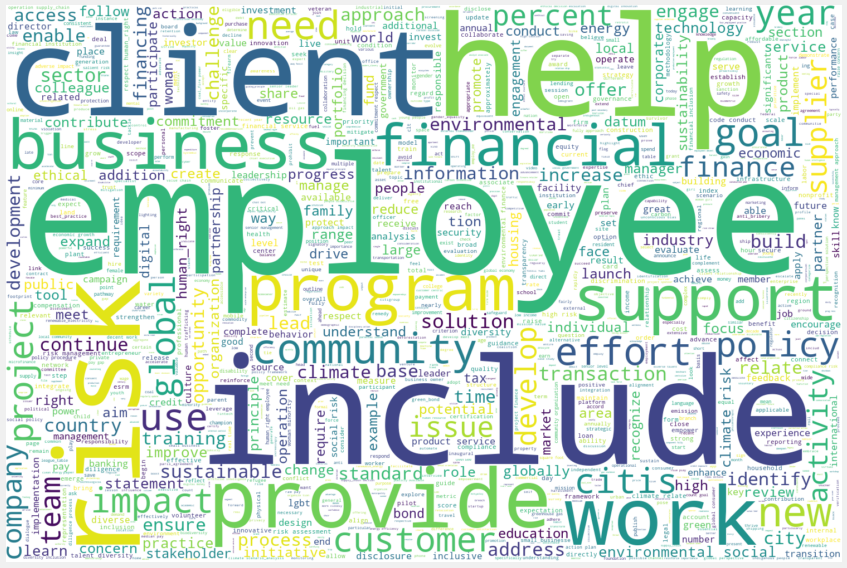

In [ ]:
from wordcloud import WordCloud

# aggregate all 7200 records into one large string to run wordcloud on term frequency
large_string = ' '.join(report_sentences_lemma)

# use 3rd party lib to compute term freq., apply stop words
word_cloud = WordCloud(
    background_color="white",
    max_words=5000, 
    width=1500, 
    height=1000, 
    stopwords=stop_words, 
    contour_width=3, 
    contour_color='steelblue'
)

# display our wordcloud across all records
plt.figure(figsize=(16,16))
word_cloud.generate(large_string)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### TFIDF - Unigram and Bigram Analysis

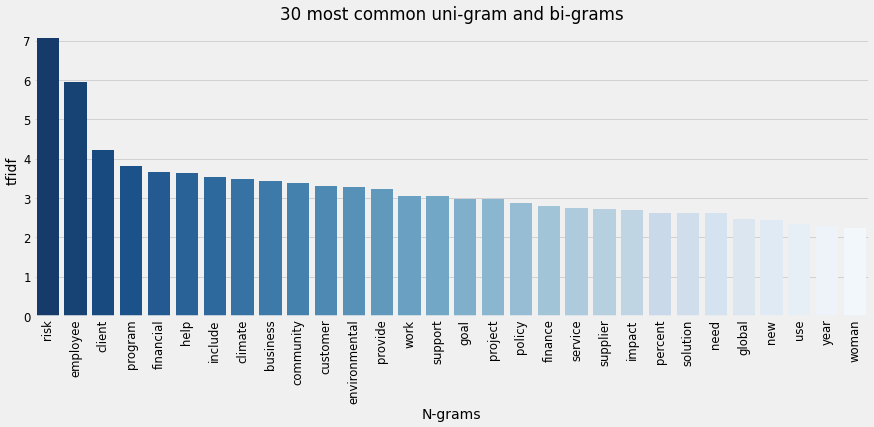

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Run bi-gram TF-IDF frequencies
bigram_tf_idf_vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,2), min_df=10, use_idf=True)
bigram_tf_idf = bigram_tf_idf_vectorizer.fit_transform(report_sentences_lemma)

# Extract bi-grams names
words = bigram_tf_idf_vectorizer.get_feature_names()

# extract our top 10 ngrams
total_counts = np.zeros(len(words))
for t in bigram_tf_idf:
    total_counts += t.toarray()[0]

count_dict = (zip(words, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words)) 

# Plot top 10 ngrams
plt.figure(figsize=(16, 6))
plt.subplot(title='30 most common uni-gram and bi-grams')
sns.barplot(x_pos, counts, palette='Blues_r')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('N-grams')
plt.ylabel('tfidf')
plt.show()

---


## Topic Modeling and Latent Dirichlet Allocation (LDA)

Evaluaton Metrics
1. **Perplexity**: Captures how surprised a model is of new data it has not seen before, and is measured as the normalized log-likelihood of a held-out test set.  Lower the better.
2. **Coherence Score**: Measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic.  Higher the better.

In the analysis, the model with the highest coherence score is selected as the optimal model.

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
results = []
optimal_score = 0
optimal_model = None

for num_of_topics in tqdm(range(2,15,1)):
    
    result = {}
    
    # Build LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=num_of_topics, 
                                                random_state=42,
                                                update_every=1,
                                                chunksize=5,
                                                passes=20,
                                                alpha='auto',
                                                per_word_topics=True) 

    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    if optimal_score < coherence_model_lda.get_coherence():
        optimal_score = coherence_model_lda.get_coherence()
        optimal_model = lda_model

    result['num_of_topics'] = num_of_topics
    result['perplexity'] = lda_model.log_perplexity(corpus)
    result['coherence_score'] = coherence_model_lda.get_coherence()
    
    results.append(result)
    
results = pd.DataFrame(results)  
results.set_index('num_of_topics', inplace=True) 

  0%|          | 0/13 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

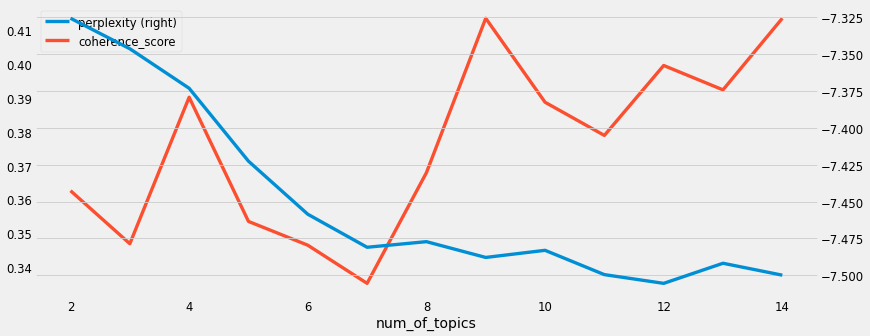

In [ ]:
results.plot(secondary_y='perplexity')
plt.show()

In [ ]:
results

,perplexity,coherence_score
num_of_topics,,
2,-7.325673,0.362555
3,-7.346353,0.346882
4,-7.373169,0.390177
5,-7.422610,0.353478
6,-7.458608,0.346444
7,-7.481022,0.335166
8,-7.477218,0.367879
9,-7.487927,0.413525
10,-7.483089,0.388703


In [ ]:
# Compute Perplexity
print('\nPerplexity of the Optimal Model: ', optimal_model.log_perplexity(corpus))  

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=optimal_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score of the Optimal Model: ', coherence_lda)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity of the Optimal Model:  -7.487926667921805

Coherence Score of the Optimal Model:  0.4135249837307597


---

## Visualize the topics

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.193792 -0.231532       1        1  36.032864
4     -0.257325  0.211793       2        1  22.001023
2     -0.048041 -0.081520       3        1   8.917197
8      0.032059 -0.059178       4        1   8.321269
6      0.163548 -0.047703       5        1   8.210330
1     -0.005193  0.019893       6        1   7.651685
7      0.181362  0.029258       7        1   6.297980
5      0.064177  0.166266       8        1   2.129091
0      0.063205 -0.007277       9        1   0.438561, topic_info=               Term        Freq      Total Category  logprob  loglift
336          report  103.000000  103.00000  Default  30.0000  30.0000
66    environmental   93.000000   93.00000  Default  29.0000  29.0000
342            risk  138.000000  138.00000  Default  28.0000  28.0000
53         customer   62.000000   62.00000  Default  27.0000  27.0000
261        employee  256.000000  256.00000  Default  26.0000  26.0000
...             ...         ...        ...      ...      ...      ...
2088           nize    0.187763    0.97589   Topic9  -6.0016   3.7813
2091      rainwater    0.187763    0.97589   Topic9  -6.0016   3.7813
2089       platinum    0.187763    0.97589   Topic9  -6.0016   3.7813
2101    temperature    0.187763    0.97589   Topic9  -6.0016   3.7813
2100           tank    0.187763    0.97589   Topic9  -6.0016   3.7813

[412 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1         1  0.970906      access
1117      3  0.921393  accessible
2872      8  0.925607   accompany
376       2  0.642669      action
376       6  0.338247      action
...     ...       ...         ...
210       3  0.231041       world
212       1  0.630417        year
212       3  0.297697        year
212       4  0.070046        year
213       5  0.967012       young

[433 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 3, 9, 7, 2, 8, 6, 1])

In [ ]:
# Print the Keyword in the 10 topics
pprint(optimal_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.023*"annually" + 0.013*"lighting" + 0.009*"separate" + 0.009*"retrofit" + '
  '0.007*"ownership" + 0.002*"footage" + 0.002*"gallon" + 0.002*"fixture" + '
  '0.002*"irrigate" + 0.002*"installa"'),
 (1,
  '0.028*"climate" + 0.023*"risk" + 0.016*"sector" + 0.014*"enhance" + '
  '0.013*"governance" + 0.013*"update" + 0.013*"power" + 0.013*"client" + '
  '0.012*"feedback" + 0.012*"disclosure"'),
 (2,
  '0.032*"product" + 0.031*"solution" + 0.031*"use" + 0.018*"goal" + '
  '0.018*"greenhouse" + 0.017*"technology" + 0.016*"finance" + 0.015*"quality" '
  '+ 0.014*"energy" + 0.014*"develop"'),
 (3,
  '0.033*"employee" + 0.019*"program" + 0.016*"help" + 0.016*"provide" + '
  '0.014*"support" + 0.012*"work" + 0.011*"community" + 0.011*"need" + '
  '0.011*"percent" + 0.010*"financial"'),
 (4,
  '0.028*"risk" + 0.022*"include" + 0.021*"policy" + 0.020*"environmental" + '
  '0.019*"report" + 0.018*"citis" + 0.016*"management" + 0.015*"project" + '
  '0.014*"base" + 0.014*"client"'),
 (5,
 

---

## Distinguishing the different ESG topics

In [ ]:
topic_names = {0: 'support community', 1: 'value employees'}

#     'value employees',
#     'ethical investments',
#     'strong governance',
#     'focus customer',    
#     'green energy',
#     'support community',
#     'code of conduct',
#     'sustainable finance',
#     'company transformation',


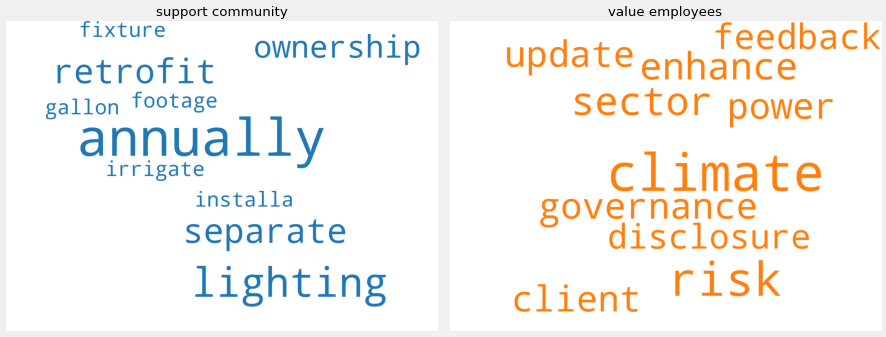

In [ ]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=50,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = optimal_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title(topic_names[i], fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

.